# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


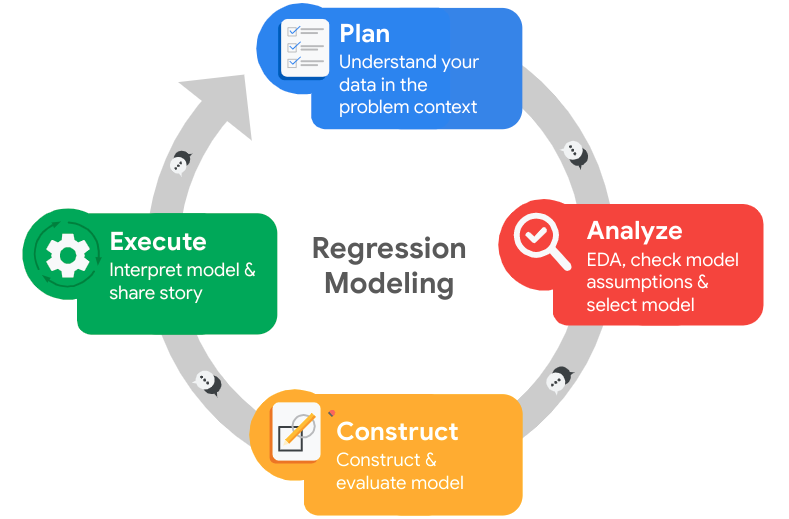

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.metrics import classification_report, log_loss

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype=object)

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Department': 'department',
                          'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'], dtype=object)

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df1.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

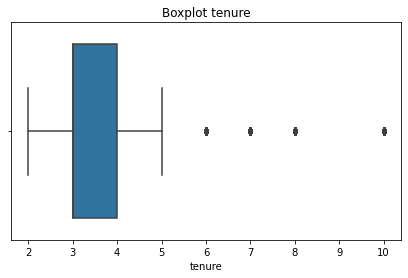

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

plt.figure(figsize=(7,4))
plt.title('Boxplot tenure')
sns.boxplot(df1['tenure'])
plt.show()

In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

percentile25 = df1['tenure'].quantile(.25)
percentile75 = df1['tenure'].quantile(.75)

iqr = percentile75 - percentile25

lower_limit = percentile25 - 1.6 * iqr
upper_limit = percentile75 + 1.6 * iqr

print('Lower limit :', lower_limit)
print('Upper limit :', upper_limit)

df1_outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print(f'Il y a {len(df1_outliers)} outliers dans \'tenure\'')

Lower limit : 1.4
Upper limit : 5.6
Il y a 824 outliers dans 'tenure'


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce : Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

stay, left = df1['left'].value_counts()
print(f'Il y a {left} personnes qui ont démissioné contre {stay} personnes qui sont toujours sous contrat.')

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###

percent_left = round((left / (stay + left)) * 100 ,2)
percent_stay = round((100 - percent_left), 2)

print(f'Ce qui correspond à {percent_left}% de personne qui ont démissioné contre {percent_stay}% toujours dans l\'entreprise.')

Il y a 1991 personnes qui ont démissioné contre 10000 personnes qui sont toujours sous contrat.
Ce qui correspond à 16.6% de personne qui ont démissioné contre 83.4% toujours dans l'entreprise.


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [17]:
df1.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


Text(0.6296580768909951, 0.47, 'Moy: 0.63')

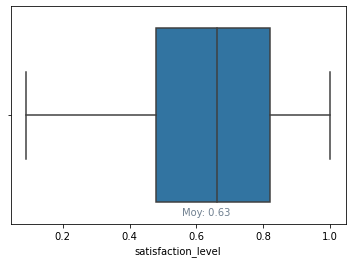

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
ax = sns.boxplot(x = df1['satisfaction_level'])

mean_value = df1['satisfaction_level'].mean()
ax.text(mean_value, 0.47, f'Moy: {mean_value:.2f}', ha='center', va='bottom', color='slategrey')

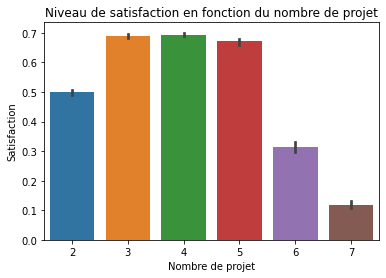

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(x = df1['number_project'], y = df1['satisfaction_level'])
plt.title('Niveau de satisfaction en fonction du nombre de projet')
plt.xlabel('Nombre de projet')
plt.ylabel('Satisfaction')
plt.show()

Ce graphique permet déjà de voir que les employés sont moins heureux quand ils sont aux extrèmes en termes de nombre de projet. Il faudrait essayer de répartir plus homogènement les projets entre les employés.

In [20]:
num_project = df1['number_project'].value_counts()
num_project = num_project.reset_index()
num_project.columns = ['number_project', 'count']

In [21]:
num_project

,number_project,count
0,4,3685
1,3,3520
2,5,2233
3,2,1582
4,6,826
5,7,145


In [22]:
num_project2 = df1.groupby('number_project')['left'].value_counts()
num_project2_df = pd.DataFrame(num_project2)
num_project2_df.columns = ['count']

In [23]:
num_project2_df = num_project2_df.reset_index()
num_project2_df

,number_project,left,count
0,2,1,857
1,2,0,725
2,3,0,3482
3,3,1,38
4,4,0,3448
5,4,1,237
6,5,0,1890
7,5,1,343
8,6,0,455
9,6,1,371


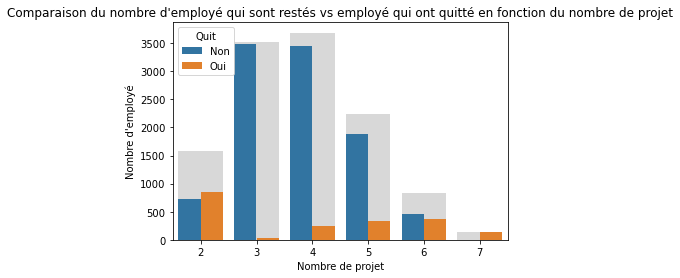

In [24]:
sns.barplot(x='number_project', y='count', data=num_project, color='gray', alpha=0.3)
sns.barplot(x='number_project', y='count', hue='left', data=num_project2_df)

plt.title('Comparaison du nombre d\'employé qui sont restés vs employé qui ont quitté en fonction du nombre de projet')
plt.xlabel('Nombre de projet')
plt.ylabel('Nombre d\'employé')

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ["Non", "Oui"]

plt.legend(title="Quit", handles=handles, labels=new_labels)
plt.show()

On peut aussi voir que les proportions de personnes qui ont quitté l'entreprise est croissant à partir de 3 projets. En sachant que 100% des employés qui avaient 7 projets ont quitté l'entreprise. 

Il y a aussi une très grosse proportion d'employé qui ont quitté l'entreprise qui étaient sur 2 projets. Il faut voir si ces employés étaient nouveaux (donc on leur propose pas beaucoup de tâches) ou si il y a juste une mauvaise répartition des projets. 

À noter que si la majorité des employés qui ont 2 projets sont nouveaux dans l'entreprise, le fait qu'il y ait beaucoup de démission peut être aussi due à une mauvaise entente au sein de l'entreprise.

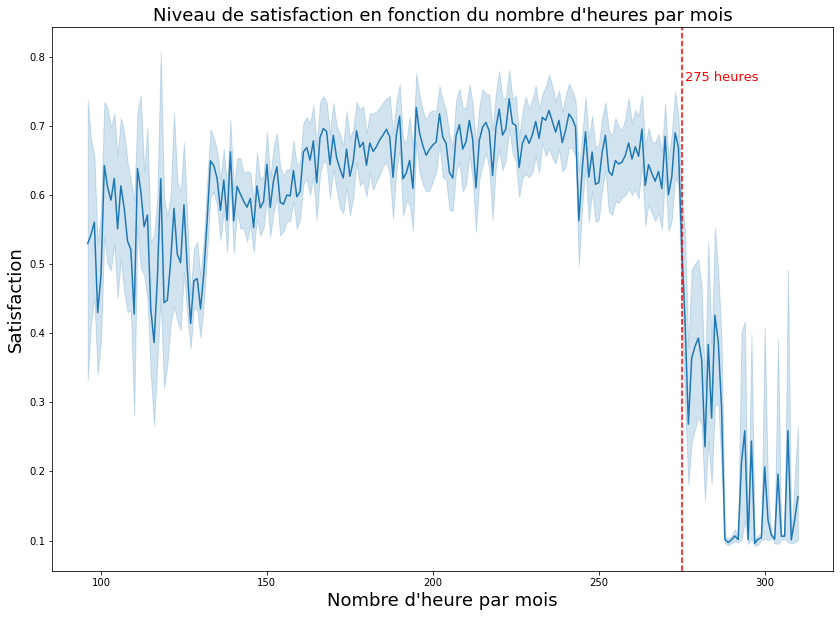

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(14,10))
sns.lineplot(x = df1['average_monthly_hours'], y = df1['satisfaction_level'])
plt.title('Niveau de satisfaction en fonction du nombre d\'heures par mois', fontsize=18)
plt.xlabel('Nombre d\'heure par mois', fontsize=18)
plt.ylabel('Satisfaction', fontsize=18)
plt.axvline(275, color='red', linestyle='--')
plt.text(276, 0.78, '275 heures', color='red', ha='left', va='top', fontsize=13)
plt.show()

On peut aussi voir que la satisfaction les employés est globalement bonne jusqu'à 275 heures par mois, où on peut voir une très grosse chute de la satisfaction des employés.

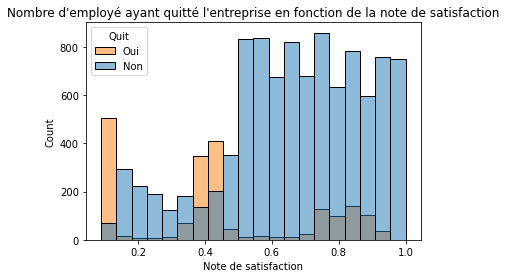

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.histplot(x=df1['satisfaction_level'], hue=df1['left'], bins=20)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ["Oui", "Non"]

plt.title('Nombre d\'employé ayant quitté l\'entreprise en fonction de la note de satisfaction')
plt.xlabel('Note de satisfaction')
plt.legend(title="Quit", labels=new_labels)

Ce graphique donne le nombre d'employés qui ont quitté l'entreprise en fonction de leur note de satisfaction. On peut voir que parmis les employés ayant quitté l'entreprise, une grande proportion l'avait déjà fait savoir en mettant une note de satisfaction inférieure à 0,5. On peut aussi voir qu'un bon nombre d'employé qui restent sont tout autant insatisfait que ceux qui ont quitté l'entreprise.

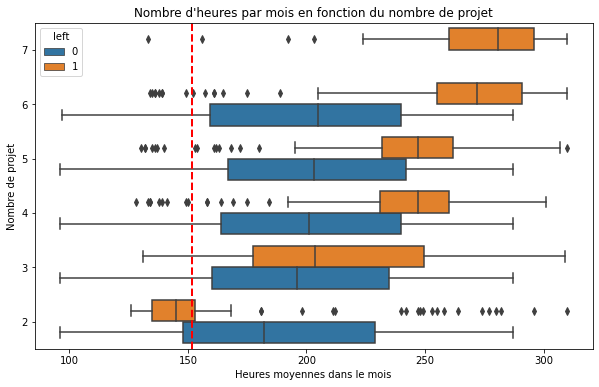

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))

ax = sns.boxplot(x=df1['average_monthly_hours'], y=df1['number_project'], hue=df1['left'], orient='h')
ax.invert_yaxis()
plt.title('Nombre d\'heures par mois en fonction du nombre de projet')
plt.xlabel('Heures moyennes dans le mois')
plt.ylabel('Nombre de projet')

plt.axvline(x=151.67, color='red', linestyle='--', linewidth=2)

plt.show()

On peut voir avec ce graph que les personnes qui ont plus de projets travaillent plus, ce qui va communément de pair. On peut aussi voir que les personnes qui ont quitté l'entreprise ont plus d'heure de travail que les personnes toujours dans l'entreprise, sur le même nombre de tâches. Il est très probable que ces personnes aient démissionné. 

Il y a une exception pour les employés qui font 2 tâches, ceux qui ont quitté l'entreprise ont moins de temps de travail que les autres. Une explication possible du fait qu'ils ne soient plus dans l'entreprise est qu'ils aient été licencié.

D'après le site du service-public, le temps de travail moyen au mois est de **151,67 heures**. Si on met une ligne on peut voir que tous les employés dans ce secteur travaillent plus.

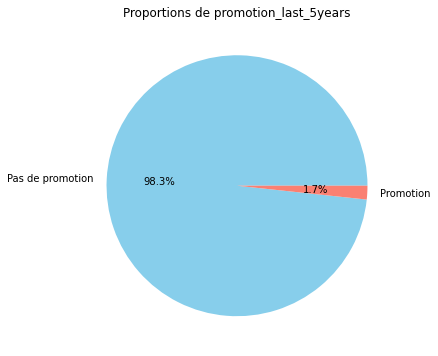

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
counts = df1['promotion_last_5years'].value_counts()

# Tracer le pie chart

label_dict = {0: 'Pas de promotion', 1: 'Promotion'}

# Créer des labels personnalisés en utilisant le dictionnaire
custom_labels = [label_dict[key] for key in counts.index]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=custom_labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proportions de promotion_last_5years')
plt.show()

Il y a très peu de promotion malgré le fait que quasiment tous les employés soient surexploités.

Text(0.5, 1.0, 'Count of stayed/left by department')

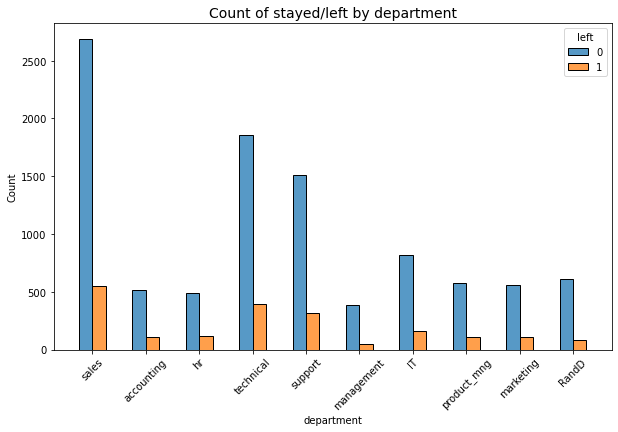

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.histplot(x=df1['department'], hue=df1['left'], discrete=1,
             hue_order=[0,1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')

plt.title('Count of stayed/left by department', fontsize=14)

Il semble ne pas y avoir de différence en terme de licenciement/démission entre tous les départements.

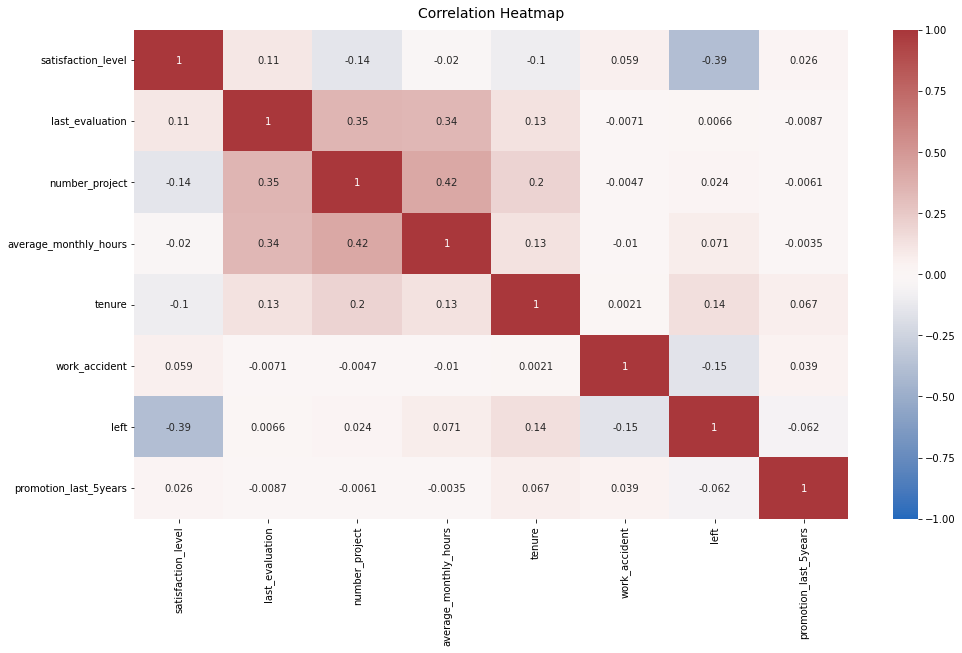

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

**La correlation map nous montre plusieurs chose :**

> Left et Satisfaction_level sont corrélés négativement, autrement dit, plus les employés sont insatisfaits et plus ils quittent l'entreprise, et inversement.

> On peut voir que last_evaluation est corrélé positivement avec number_project et average_monthly_hours, donc plus la personne travaille et mieux elle est notée.

> Il y a aussi une corrélation positive entre average_monthly_hours et number_project, ce qui a été dit précédemment, plus les employés ont de projets et plus ils travaillent.

In [31]:
df1[df1['number_project'] == 7]['last_evaluation'].mean()

0.8635172413793101

In [32]:
mean_eval_score = pd.DataFrame(df1.groupby('number_project')['last_evaluation'].mean().reset_index())

In [33]:
mean_eval_score

,number_project,last_evaluation
0,2,0.584640
1,3,0.717415
2,4,0.735682
3,5,0.750072
4,6,0.765654
5,7,0.863517


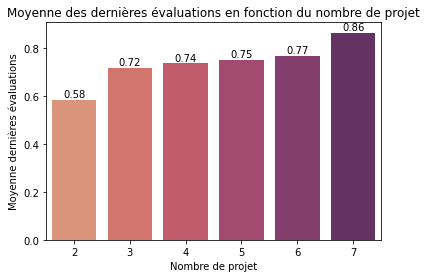

In [34]:
sns.barplot(x='number_project', y='last_evaluation', data=mean_eval_score, palette='flare')
plt.title('Moyenne des dernières évaluations en fonction du nombre de projet')
plt.xlabel('Nombre de projet')
plt.ylabel('Moyenne dernières évaluations')

for i, value in enumerate(mean_eval_score['last_evaluation']):
    plt.text(i, value + 0.0025, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Les employés sont quand même "récompensés" avec des bons evaluation scores.

### Insights

Ce qui ressort de ce premier EDA est que les employés sont très probablement surexploités, sans gratification particulière car les promotions sont très rares dans cette entreprise. 

Pour la majorité des cas, les employés quittent l'entreprise à cause d'une charge de travail et un nombre de projet trop élevés ainsi qu'un niveau de satisfaction faible.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

L'objectif est de déterminer si l'employé va quiiter ou non l'entreprise (y = df1['left']). Il s'agit donc d'une classification binaire car il n'y a que 2 possibilités 1 ou 0.

### Identify the types of models most appropriate for this task.

Pour la classification binaire on peut directement penser à une régression logistique. Comme c'est une classification on peut aussi utiliser des Tree-based machine learning models (Decision Tree, Random Forest, Extreme Gradient Boosting - XGBoost).

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Logistic Regression

Pour faire la régression logistique il va falloir faire plusieurs choses :

1. Passer les colonnes catégoriques en numériques

2. Vérifier les corrélations entre les variables explicatives

3. Regarder s'il y a des outliers dans nos données

##### Encoder les colonnes

In [35]:
df1.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'], dtype=object)

In [36]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [37]:
### YOUR CODE HERE ###
# Créer une copie de df1
df_enc = df1.copy()

# Transformer la colonne 'salary' en categorique ordinale numérique
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Encoder la colonne restante 'department'
df_enc = pd.get_dummies(df_enc, drop_first=True)

# Afficher le dataframe 
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [38]:
# Vérification de la colonne 'salary'
df_enc['salary'].value_counts()

0    5740
1    5261
2     990
Name: salary, dtype: int64

##### Vérifier les corrélations

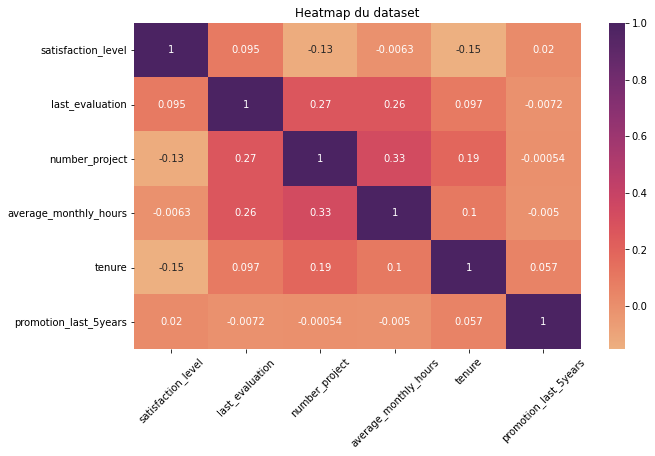

In [39]:
# Vérifier les assumptions d'une régression logistique 
# Vérifier la corrélation entre les variables

plt.figure(figsize=(10,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'promotion_last_5years']].corr(), annot=True, cmap='flare')
plt.title('Heatmap du dataset')
plt.xticks(rotation = 45)
plt.show()

#### VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

print(vif_data)

                 feature        VIF
0     satisfaction_level   6.669769
1        last_evaluation  18.743123
2         number_project  13.524000
3  average_monthly_hours  17.882954
4                 tenure   7.043206


Les score des VIF sont beaucoup trop élevés pour 'last_evaluation', 'number_project' et 'average_monthly_hours'. Ce qui peut poser problème concernant les résultats de la Régression Logistique.

**On retire last_evaluation pour vérifier l'évolution des VIF**

In [41]:
df_vif2 = df_enc[['satisfaction_level', 'number_project', 'average_monthly_hours', 'tenure']]
vif_data2 = pd.DataFrame()
vif_data2["feature"] = df_vif2.columns
vif_data2["VIF"] = [variance_inflation_factor(df_vif2.values, i) for i in range(len(df_vif2.columns))]

print(vif_data2)

                 feature        VIF
0     satisfaction_level   5.762419
1         number_project  12.059074
2  average_monthly_hours  15.193876
3                 tenure   6.741651


Les VIF sont toujours trop élevés.

**On retire number_project pour vérifier l'évolution des VIF**

In [42]:
df_vif3 = df_enc[['satisfaction_level', 'average_monthly_hours', 'tenure']]
vif_data3 = pd.DataFrame()
vif_data3["feature"] = df_vif3.columns
vif_data3["VIF"] = [variance_inflation_factor(df_vif3.values, i) for i in range(len(df_vif3.columns))]

print(vif_data3)

                 feature       VIF
0     satisfaction_level  5.718496
1  average_monthly_hours  9.585517
2                 tenure  6.069735


Le résultat est toujours très élevé mais ça reste plus raisonnable qu'avant. On peut essayer de faire la régression logistique avec ces variables explicatives et faire un Tree based machine learning par la suite car ils sont moins susceptibles aux autocorrélations dans les données.

#### Vérification des outliers dans les données

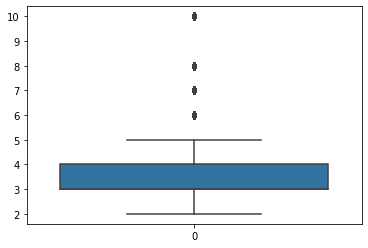

In [43]:
sns.boxplot(data=df_enc['tenure'])

Il y a quelques outliers

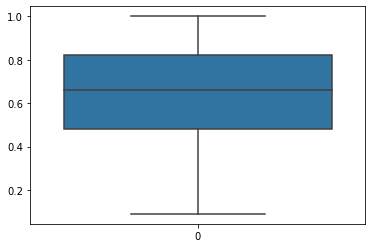

In [44]:
sns.boxplot(data=df_enc['satisfaction_level'])

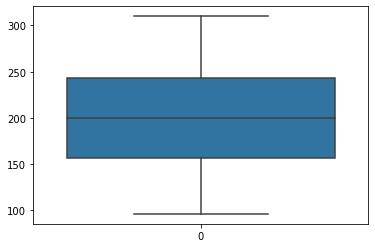

In [45]:
sns.boxplot(data=df_enc['average_monthly_hours'])

**On gère les outliers dans tenure qu'on a vu plus haut dans le notebook** 

In [46]:
df_log_reg = df_enc.copy()
df_log_reg = df_log_reg[(df_log_reg['tenure'] >= lower_limit) & (df_log_reg['tenure'] <= upper_limit)]

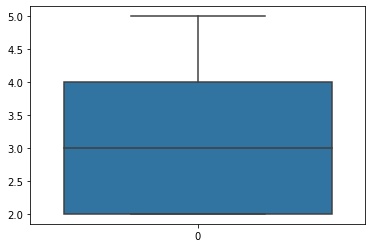

In [47]:
sns.boxplot(data=df_log_reg['tenure'])

Il y a quand même une class imbalance dans la variable dépendante y :

In [48]:
df_log_reg['left'].value_counts()

0    9285
1    1882
Name: left, dtype: int64

Je vais faire une régression logistique avec et sans class_weight='balanced'.

**Régression Logistique sans équilibrer les classes**

In [49]:
y = df_log_reg['left']

X = df_log_reg.drop(['left', 'last_evaluation', 'number_project'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)

In [50]:
log_clf = LogisticRegression(random_state=42, max_iter=500)

log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = log_clf.predict(X_test)

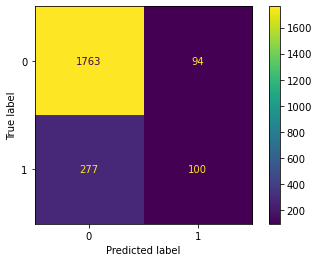

In [52]:
# On instancie la matrice de confusion avec les données
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# On donne les informations pour le ConfusionMatrixDisplay
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot la matrice de confusion
log_disp.plot(values_format='')

# Plot le display
plt.show()

Les cadrants de la matrice de confusion représente :

- Haut gauche - **Vrais Négatifs** - représente les personnes qui sont prédites comme toujours dans l'entreprise et sont réellement toujours dans l'entreprise

- Haut droite - **Faux Positifs** - représente le nombre de personnes qui ont quitté l'entreprise et que le modèle a prédit toujours dans l'entreprise

- Bas gauche - **Faux Négatifs** - représente le nombre de personnes qui ont quitté l'entreprise que le modèle a prédit restantes dans l'entreprise

- Bas droite - **Vrais Positifs** - représente le nombre d'employé qui ont quitté l'entreprise qui ont bien été prédit par le modèle

In [53]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.95      0.90      1857
    Predicted would leave       0.52      0.27      0.35       377

                 accuracy                           0.83      2234
                macro avg       0.69      0.61      0.63      2234
             weighted avg       0.81      0.83      0.81      2234



La précision du modèle est de 0,81, le recall de 0,83 et le f1 score de 0,81. Globalement, le modèle semble très bon mais les prédictions des employés qui quittent l'entreprise sont très mauvaises.

**Régression Logistique avec un upsampling pour équilibrer les classes**

In [54]:
from sklearn.utils import resample

# Séparer les classes majoritaires et minoritaires
df_majority = df_log_reg[df_log_reg['left'] == 0]
df_minority = df_log_reg[df_log_reg['left'] == 1]

# Suréchantillonner la classe minoritaire
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Échantillonnage avec remise
                                 n_samples=int(len(df_majority) / 2),  # Faire correspondre le nombre d'échantillons de la classe majoritaire
                                 random_state=42)  # Pour la reproductibilité

# Combiner les classes majoritaires et minoritaires rééquilibrées
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Vérifier la distribution des classes après suréchantillonnage
print(df_upsampled['left'].value_counts())

0    9285
1    4642
Name: left, dtype: int64


In [55]:
df_upsampled.shape

(13927, 18)

In [56]:
y = df_upsampled['left']

X = df_upsampled.drop(['number_project', 'last_evaluation', 'left'], axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0)

In [59]:
# log_clf2 = LogisticRegression(random_state=42, max_iter=500)

log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred2 = log_clf.predict(X_test)

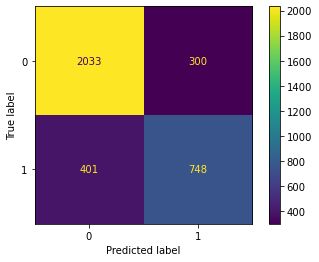

In [61]:
# On instancie la matrice de confusion avec les données
log_cm2 = confusion_matrix(y_test, y_pred2, labels=log_clf.classes_)

# On donne les informations pour le ConfusionMatrixDisplay
log_disp2 = ConfusionMatrixDisplay(confusion_matrix=log_cm2,
                                  display_labels=log_clf.classes_)

# Plot la matrice de confusion
log_disp2.plot(values_format='')

# Plot le display
plt.show()

In [62]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred2, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.84      0.87      0.85      2333
    Predicted would leave       0.71      0.65      0.68      1149

                 accuracy                           0.80      3482
                macro avg       0.77      0.76      0.77      3482
             weighted avg       0.80      0.80      0.80      3482



Le modèle est plus précis dans la prédiction des personnes qui quittent l'entreprise.

La précision est de 0,87, le recall de 0,84 et le f1 score de 0,84. Donc le modèle est meilleur globalement que lorsque les classes n'étaient pas équilibrée.

**Le modèle est meilleur dans la détection des employés qui quittent l'entreprise. Mais cela provoque aussi l'augmentation du taux de Faux Positifs (cadrant haut droit) car le modèle est plus sensible aux départs.**

**Si l'objectif de l'entreprise est de prédire les départs, ce modèle est pour l'instant le meilleur. Cela-dit il faut aussi calculer les coûts engendrer par l'augmentation du nombre de Faux Positifs.**

### Tree-based Model

In [63]:
# Isoler la variable dépendante
y = df_enc['left']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [64]:
# Sélectionner les variables indépendantes
X = df_enc.drop('left', axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
# Faire un train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

#### Decision Tree

In [66]:
# On instancie le modèle
tree = DecisionTreeClassifier(random_state=0)

# On fait un dictionnaire des hyperparamètres à tester dans le GridSearch
cv_params = {
    'max_depth': [4, 6, 8, 12, None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [1, 3, 6]
}

# On indique les metrics qu'on veut sortir du GridSearch
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# On instancie le GridSearch
tree_cv = GridSearchCV(tree,
                       cv_params,
                       scoring,
                       cv=5,
                       refit='f1')

In [67]:
%%time
tree_cv.fit(X_train, y_train)

CPU times: user 4.53 s, sys: 0 ns, total: 4.53 s
Wall time: 4.53 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 12, None],
                         'min_samples_leaf': [1, 2, 4, 6],
         

In [68]:
tree_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [69]:
tree_cv.best_score_

0.9452868169775777

Une fonction helper pour facilité l'affichage des metrics dans un tableau.

In [70]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'auc': 'mean_test_roc_auc',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        'auc': [auc]
                        },
                       )

    return table

Scores de notre Decision Tree :

In [71]:
tree_cv_results = make_results('Decision Tree CV', tree_cv, 'f1')
tree_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.970401,0.921532,0.945287,0.982277,0.965783


Les résultats sont plutôt bons:

- La precision de .97 indique que le modèle est bon à éviter les faux positifs

- Le recall de .92 indique que le modèle est aussi bon à éviter les faux négatifs

- Le f1 est simplement la moyenne harmonique de la précision et du recall, un résultat de .95 montre qu'il y a un bon compromis entre la precision et le recall

- Le AUC est une valeur qui indique si le modèle est bon à séparer les classes dans 'left'. En l'occurrence, un score de .97 est très bon

#### Random Forest

In [72]:
rf_clf = RandomForestClassifier()

cv_params = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0]
}

scoring = {'accuracy', 'recall', 'precision', 'f1', 'roc_auc'}

In [73]:
rf_cv = GridSearchCV(rf_clf, 
                     cv_params, 
                     scoring=scoring,
                     refit='f1',
                     cv=3,
                     verbose=1)

In [74]:
#rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

On enregistre le modèle dans pickle pour ne pas avoir à refaire le fit plus tard :

In [75]:
with open('rf_model_cv.pkl', 'wb') as f:
    pickle.dump(rf_cv, f)

In [76]:
with open('rf_model_cv.pkl', 'rb') as f:
    rf1_cv = pickle.load(f)

Scores de notre Random Forest :

In [77]:
rf1_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [78]:
rf1_cv.best_score_

0.9486328593034985

In [79]:
rf_cv_results = make_results('Random Forest CV', rf1_cv, 'f1')
rf_cv_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest CV,0.983877,0.915882,0.948633,0.983528,0.978147


Comparaison entre le Decision Tree et le Random Forest :

In [80]:
model_results = pd.concat([rf_cv_results, tree_cv_results], axis=0)
model_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest CV,0.983877,0.915882,0.948633,0.983528,0.978147
0,Decision Tree CV,0.970401,0.921532,0.945287,0.982277,0.965783


Le Random Forest est meilleur pour classer les données, en revanche il est plus mauvais que le decision tree pour les faux négatifs (le recall est inférieur de ~ 0.08 soit 8%).

La décision du modèle se ferait en fonction de l'objectif, soit on veut prédire si les employés quittent (dans ce cas il faut que le modèle soit meilleur à prédire les vrais positifs) l'entreprise soit on prédit qu'ils restent (dans ce cas il faut que le modèle soit meilleur à prédire les vrais négatifs).

Le Random Forest pourrait être meilleur mais le tuning des hyperparamètres prend trop de temps.

Disons qu'on veuille détecter les vrais positifs, c'est à dire les employés qui quittent l'entreprise, il faut se baser sur le score de recall. Ainsi, on choisit le Decision Tree.

#### On peut maintenant prédire les données test et voir le résultat de notre Decision Tree

La fonction helper get_scores() n'est pas nécessaire au test de notre modèle.

In [82]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [83]:
dt_test_scores = get_scores('Decision Tree CV Test', tree_cv, X_test, y_test)
dt_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Decision Tree CV Test,0.963636,0.932161,0.947637,0.98291,0.962582


Le modèle performe encore mieux sur les données de test. Le modèle a un successrate de 94,8%. 

**Le test pour le modèle de régression logistique fait précédemment n'était pas nécessaire, et a été fait uniquement pour regarder les matrices de confusion. Si les données de test n'avaient été utilisées que pour le Decision Tree, nous aurions pu dire que nous sommes confiant sur les performances de notre modèle sur des unseen data.**

*Le fait de tester les données plusieurs fois rend le test split moins objectif.*

#### Feature Engineering

Les résultats sont très bons et semble peut-être un peu trop bons. Il se pourrait qu'il y ait un **Data Leakage**.

Fuite de données (Data Leakage) :
> Une fuite de données se produit lorsque des données qui ne devraient pas être utilisées pendant l'entraînement du modèle sont accidentellement incluses. Cela peut fausser les résultats et donner des scores trop optimistes. **En pratique, cela signifie que le modèle a accès à des informations qu'il n'aurait pas dans un contexte réel de déploiement.**

>Cela peut se produire de deux manières :
- Les données d'entraînement et d'évaluation sont mélangées (par exemple, des données d'évaluation sont accidentellement incluses dans l'entraînement).
- Certaines données utilisées ne seraient pas disponibles en conditions réelles.


Dans le cas de ces données, `satisfaction_level` et `average_monthly_hours` pourraient engendrer une fuite de données pour 2 raisons différentes.

- `satisfaction_level` : Dans un contexte réel, il se pourrait que l'entreprise ne dispose pas des niveaux de satisfaction pour tous ses employés au moment où elle souhaite faire des prédictions.

- `average_monthly_hours` : Si un employé a déjà décidé de quitter l'entreprise, ou si la direction l'a déjà identifié comme à licencier, ses heures de travail peuvent diminuer. Ainsi, ces informations ne seraient plus neutres ou indépendantes.

Si on prend en compte uniquement `satisfaction_level`, on peut remplacer cette variable explicative en une variable `overworked` qui prendrait en compte si une personne **travaille plus de 165 heures** (sachant qu'on a vu précédemment que le temps de travail mensuel moyen selon le site du service-public est de **151,67 heures**).

In [84]:
# Drop `satisfaction_level`
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [90]:
# Créer une colonne `overworked`
df2['overworked'] = df2['average_monthly_hours']

print('Min hours :', df2['overworked'].min())
print('Max hours :', df2['overworked'].max())

Min hours : 96
Max hours : 310


Maintenant, on transforme la colonne `overworked` pour mettre un 1 lorsque la personne est surchargée de travail, autrement dit quand `df2['overworked'] > 165` et 0 quand la personne travaille normalement.

In [91]:
# Si les heures de travail sont > 165 alors il est overworked
df2['overworked'] = (df2['overworked'] > 165).astype(int)

df2['overworked'].nunique()

2

In [92]:
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Maintenant, on peut enlever `average_monthly_hours` de notre dataset, pour être sur qu'il n'y a pas de **Data Leakage**.

Sachant que l'on évite le problème potentiel des employés qui travailleraient moins à cause d'un licenciement avec le `overworked`.

In [93]:
# On drop `average_monthly_hours`
df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


On peut retrain nos données avec un Decision Tree et un Random Forest

In [94]:
y = df2['left']

X = df2.drop('left', axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=0)

**Decision Tree 2**

In [106]:
# On instancie le classifier
tree2 = DecisionTreeClassifier(random_state=0)

# On fait un dictionnaire des hyperparamètres à tester dans le GridSearch
cv_params = {
    'max_depth': [4, 6, 8, 12, None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 4, 6]
}

# On indique les metrics qu'on veut sortir du GridSearch
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# On instancie le GridSearch
tree2_cv = GridSearchCV(tree2,
                        cv_params,
                        scoring,
                        cv=5,
                        refit='f1')

In [107]:
%%time
tree2_cv.fit(X_train, y_train)

CPU times: user 4.87 s, sys: 0 ns, total: 4.87 s
Wall time: 4.87 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 12, None],
                         'min_samples_leaf': [1, 2, 4, 6],
         

Résultats de notre Decision Tree :

In [108]:
tree2_cv.best_params_

{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [109]:
tree2_cv.best_score_

0.8924853795472352

In [110]:
tree2_cv_results = make_results('Decision Tree 2 CV', tree2_cv, 'f1')
tree2_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree 2 CV,0.908209,0.877421,0.892485,0.964861,0.942153


In [114]:
model_results = pd.concat([model_results, tree2_cv_results], axis=0)
model_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest CV,0.983877,0.915882,0.948633,0.983528,0.978147
0,Decision Tree CV,0.970401,0.921532,0.945287,0.982277,0.965783
0,Decision Tree 2 CV,0.908209,0.877421,0.892485,0.964861,0.942153


Le modèle est bon même sans les 2 variables explicatives `average_monthly_hours` et `satisfaction_level`.

**Random Forest 2**

In [115]:
rf2_clf = RandomForestClassifier()

cv_params = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0]
}

scoring = {'accuracy', 'recall', 'precision', 'f1', 'roc_auc'}

In [116]:
rf2_cv = GridSearchCV(rf2_clf, 
                      cv_params, 
                      scoring=scoring,
                      refit='f1',
                      cv=3,
                      verbose=1)

In [117]:
%%time
#rf2_cv.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:  4.8min finished


CPU times: user 4min 47s, sys: 0 ns, total: 4min 47s
Wall time: 4min 47s


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [118]:
with open('rf2_model_cv.pkl', 'wb') as f:
    pickle.dump(rf2_cv, f)

In [119]:
with open('rf2_model_cv.pkl', 'rb') as f:
    rf2_cv = pickle.load(f)

In [120]:
rf2_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 300}

In [123]:
rf2_cv.best_score_

0.8938479300292088

In [124]:
rf2_cv_results = make_results('Random Forest 2 CV', rf2_cv, 'f1')
rf2_cv_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest 2 CV,0.908074,0.880099,0.893848,0.965306,0.961074


In [125]:
model_results = pd.concat([model_results, rf2_cv_results], axis=0)
model_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest CV,0.983877,0.915882,0.948633,0.983528,0.978147
0,Decision Tree CV,0.970401,0.921532,0.945287,0.982277,0.965783
0,Decision Tree 2 CV,0.908209,0.877421,0.892485,0.964861,0.942153
0,Random Forest 2 CV,0.908074,0.880099,0.893848,0.965306,0.961074


Cette fois le Random Forest est meilleur que le Decision Tree. On peut l'évaluer sur nos données test :

In [126]:
# Predictions sur données test
rf2_test_scores = get_scores('Random Forest 2 test', rf2_cv, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest 2 test,0.897177,0.893574,0.895372,0.96531,0.936587


Le modèle est stable et prédit bien les données.

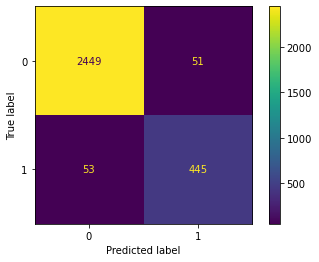

In [127]:
# Generate array of values for confusion matrix
preds = rf2_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf2_cv.classes_)
disp.plot(values_format='');

#### Decision Tree feature importance

In [136]:
# Dataframe des features et de leurs importances
tree2_importances = pd.DataFrame(tree2_cv.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )

# On trie les features dans l'ordre croissant en fonction du gini_importance
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# On retire les features qui n'ont pas d'importance dans les prédictions
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]

tree2_importances

,gini_importance
last_evaluation,0.333063
number_project,0.299924
tenure,0.245820
overworked,0.095639
salary,0.010236
department_support,0.003134
department_technical,0.003061
work_accident,0.003008
department_accounting,0.002324
promotion_last_5years,0.001779


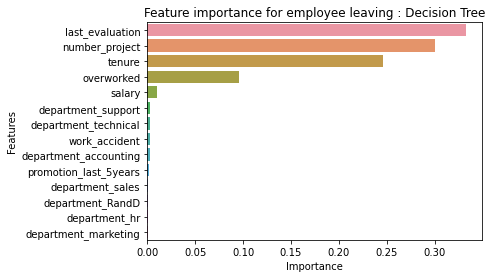

In [147]:
# Plot les features importances
sns.barplot(tree2_importances['gini_importance'], tree2_importances.index)
plt.title('Feature importance for employee leaving : Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

Cette partie nous permet de comprendre quels sont les variables qui expliquent le mieux les variations de `left`. Ici, on voit que `last_evaluation`, `number_project`, `tenure`, et `overworked` sont les principales variables explicatives de `left` d'après le Decision Tree.

On peut aussi vérifier les feature importances pour le Random Forest

#### Random forest feature importance

In [149]:
feat_imp_rf2 = rf2_cv.best_estimator_.feature_importances_

# Dataframe des features et de leurs importances
rf2_importances = pd.DataFrame(feat_imp_rf2, 
                               columns=['gini_importance'], 
                               index=X.columns
                               )

In [158]:
# On trie les features dans l'ordre croissant en fonction du gini_importance
rf2_importances = rf2_importances.sort_values('gini_importance', ascending=False)

In [159]:
# On retire les features qui n'ont pas d'importance dans les prédictions
rf2_importances = rf2_importances[rf2_importances['gini_importance'] != 0]

In [160]:
rf2_importances

,gini_importance
last_evaluation,0.340747
number_project,0.317193
tenure,0.208742
overworked,0.090882
salary,0.014430
work_accident,0.006475
department_technical,0.005390
department_sales,0.005186
department_support,0.004054
department_accounting,0.001506


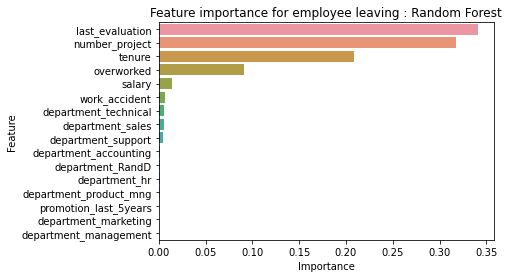

In [162]:
sns.barplot(rf2_importances['gini_importance'], rf2_importances.index)

plt.title('Feature importance for employee leaving : Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()

Les variables explicatives sont les mêmes que pour le Decision Tree.

#### Analyse des features

En connaissant les features importantes dans l'explication de `left` on peut refaire une analyse pour comprendre ce qu'il faut faire pour garder les employés.

In [163]:
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [175]:
df2.groupby('left')['number_project'].value_counts()

left  number_project
0     3                 3482
      4                 3448
      5                 1890
      2                  725
      6                  455
1     2                  857
      6                  371
      5                  343
      4                  237
      7                  145
      3                   38
Name: number_project, dtype: int64

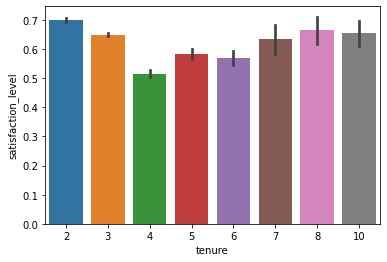

In [178]:
sns.barplot(df1['tenure'], df1['satisfaction_level'])

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Régression Logistique** 

La régression logistique avec l'équilibrage des classes a plutôt bien performé avec des scores de 80% pour la précision, le recall et le f1 score sur l'échantillon test.


**Tree based machine learning**

Après une décision de faire du feature engineering sur les variables explicatives à cause d'un potentiel Data Leakage. Le Random Forest a légèrement outperformed le Decision Tree, avec des résultats surprenants. 89.7% pour la précision, 89.4% pour le recall, 89.5% pour le f1, 96.5% pour l'accuracy et 93.7% pour l'AUC sur l'échantillon test.

### Conclusion, Recommendations, Next Steps

D'après les feature importances il est très probable que les employés quittent l'entreprise car ils sont surchargés de travail.

Pour éviter que les employés ne démissionnent : 

- Il serait juste de mieux répartir les projets au sein des équipes - ou limiter le nombre de projets par personne

- Il faudrait essayer de comprendre pourquoi les employés avec 4 ans de poste sont moins satisfait que le reste des employés

    - Et éventuellement proposer des promotions aux employés à partir de 4 ans de poste
    
    
#### Next Steps

Il faut quand même garder en tête le Data Leakage (*En pratique, cela signifie que le modèle a accès à des informations qu'il n'aurait pas dans un contexte réel de déploiement*). Il est probable que les évaluations ne soient pas faites fréquemment et il serait plus prudent de regarder comment les prédictions changent sans `last_evaluation`. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.